Замена импорта всех инженерных библиотек одним вызовом

Работает только в Jupyter Notebook

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Построение области

In [2]:
def plot_D(X, Y1, Y2, Xdots=None, Ydots1=None, Ydots2=None):
    plt.figure(figsize=(16,9))
    plt.plot(X, Y1, "-b")
    plt.plot(X, Y2, "-b")
    plt.vlines(X[0], Y1[0], Y2[0], colors="b")
    plt.vlines(x=X[-1], ymin=Y1[-1], ymax=Y2[-1], colors="b")
    plt.fill_between(X, Y1, Y2, color="red", alpha=0.5)
    if Xdots != None and Ydots1 != None:
        plt.plot(Xdots, Ydots1, "ob")
    if Xdots != None and Ydots2 != None:
        plt.plot(Xdots, Ydots2, "ob")
        if Ydots1 != None:
            plt.vlines(Xdots, Ydots1, Ydots2, colors='b', alpha=0.9)
    plt.xlim(X[0]-1,X[-1]+1)
    plt.grid()
    plt.show()

In [3]:
def f1(X):
    return np.sqrt(X)
def f2(X):
    return 2+np.sqrt(X)/2

In [4]:
X = np.linspace(1,10,20)
Y1 = f1(X)
Y2 = f2(X)

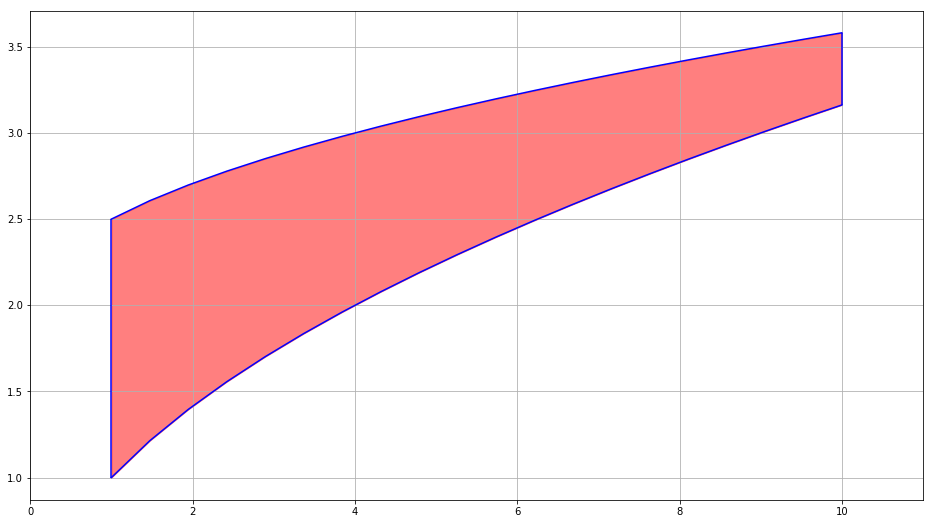

In [5]:
plot_D(X, Y1, Y2)

# Построение равномерной сетки и сеток со сгущением

Все методы из example.py

In [6]:
def f1(x):
    return np.sqrt(x)
def f2(x):
    return 2+0.5*np.sqrt(x)
def f_eta_s(eta,eta_a,eta_e):
    return (eta-eta_a)/(eta_e-eta_a)
def f_s(eta_s,P,Q):
    return P*eta_s+(1-P)*(1-(np.tanh(Q*(1-eta_s))/(np.tanh(Q))))
def f_x(s,x_a,x_e):
    return x_a+s*(x_e-x_a)

def mesh(P1=1, Q1=1, P2=1, Q2=1):
    plt.figure(figsize=(16,9))
    X = np.linspace(1,10,20)
    Y1 = f1(X)
    Y2 = f2(X)
    plt.plot(X, Y1, "-b")
    plt.plot(X, Y2, "-b")
    plt.vlines(X[0], Y1[0], Y2[0], colors="b")
    plt.vlines(x=X[-1], ymin=Y1[-1], ymax=Y2[-1], colors="b")
    plt.fill_between(X, Y1, Y2, color="red", alpha=0.25)


    N=40
    M=20
    eta_a=0
    eta_e=eta_a+N

    ksi_a=0
    ksi_e=ksi_a+M

    x_a=1.0
    x_e=10.0

    X=np.zeros((M+1,N+1))
    Y=np.zeros((M+1,N+1))

    eta=np.arange(eta_a,eta_e+1,1)
    eta_s=f_eta_s(eta,eta_a,eta_e)
    s=f_s(eta_s,P1,Q1)
    X[0]=f_x(s,x_a,x_e)
    Y[0]=f1(X[0])

    s=f_s(eta_s,P2,Q2)
    X[M]=f_x(s,x_a,x_e)
    Y[M]=f2(X[M])

    for i in range(0,M+1,1):
        for j in range (0,N+1,1):
            ksi_s=f_eta_s(i,ksi_a,ksi_e)
            X[i][j]=(1-ksi_s)*X[0][j]+ksi_s*X[M][j]
            Y[i][j]=(1-ksi_s)*Y[0][j]+ksi_s*Y[M][j]


    for i in range(0, M+1, 1):
        plt.plot(X[i], Y[i], "-b", alpha=0.8)

    for i in range(0, N+1, 1):
        plt.plot(X.T[i], Y.T[i], "-b", alpha=0.8)

    #plt.scatter(X,Y)
    plt.show()

### Равномерная сетка

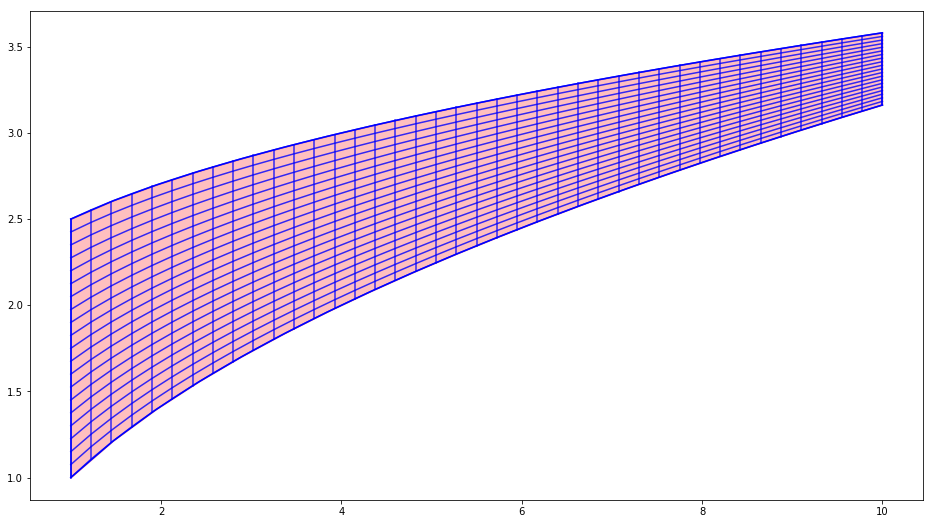

In [7]:
mesh()

Замена P1, Q1, P2, Q2 ради эксперимента

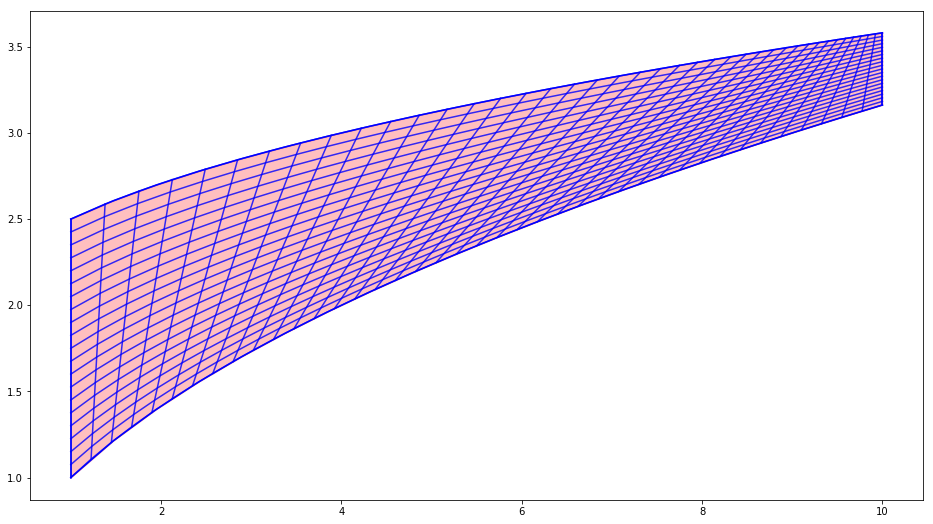

In [8]:
mesh(2, 1e-3, 2, 1.5)

### Сгущение к началу канала

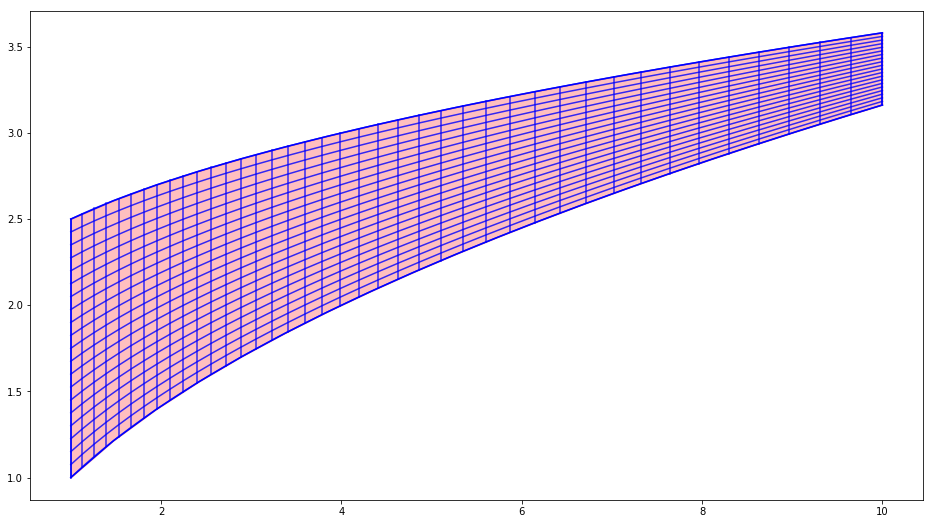

In [9]:
mesh(0.5, 2, 0.5, 2)

### Сгущение к концу канала

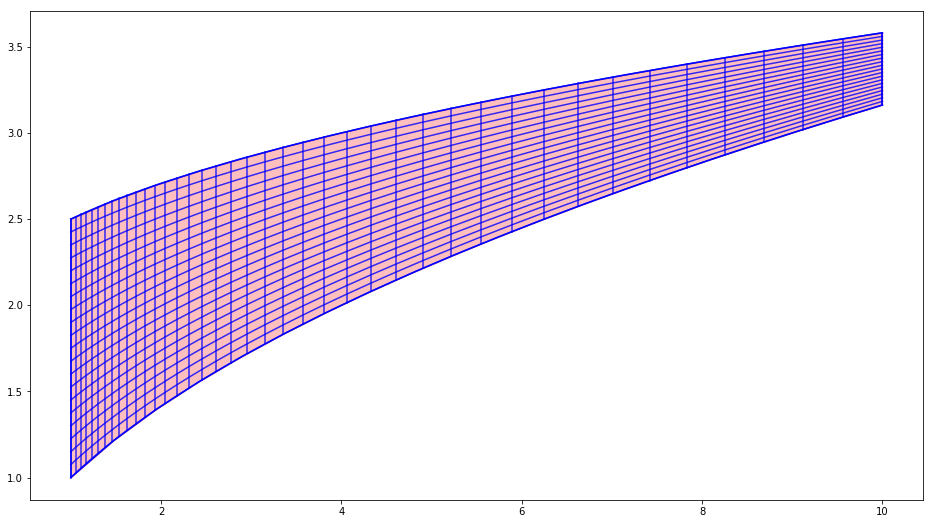

In [10]:
mesh(0.1, 2, 0.1, 2)

## Сетки, локально ортоганальные к верхней и нижней границе канала

In [23]:
def f1(x):
    return np.sqrt(x)
def f2(x):
    return 2+0.5*np.sqrt(x)
def f1rev(y):
    return y**2
def f2rev(y):
    return (2*(y-2))**2
def f_eta_s(eta,eta_a,eta_e):
    return (eta-eta_a)/(eta_e-eta_a)
def f_ksi_s(eta,eta_a,eta_e):
    return (eta-eta_a)/(eta_e-eta_a)
def f_s(eta_s,P,Q):
    return P*eta_s+(1-P)*(1-(np.tanh(Q*(1-eta_s))/(np.tanh(Q))))
def f_x(s,x_a,x_e):
    return x_a+(1-s)*(x_e-x_a)
def f_y(s,y_a,y_e):
    return y_a+(1-s)*(y_e-y_a)

def meshy(P1=1, Q1=1, P2=1, Q2=1):
    plt.figure(figsize=(16,9))
    X = np.linspace(1,10,20)
    Y1 = f1(X)
    Y2 = f2(X)
    plt.plot(X, Y1, "-b")
    plt.plot(X, Y2, "-b")
    plt.vlines(X[0], Y1[0], Y2[0], colors="b")
    plt.vlines(x=X[-1], ymin=Y1[-1], ymax=Y2[-1], colors="b")
    plt.fill_between(X, Y1, Y2, color="red", alpha=0.25)


    N=30
    M=10
    eta_a=0
    eta_e=eta_a+N

    ksi_a=0
    ksi_e=ksi_a+M

    x_a=1.0
    x_e=10.0

    X=np.zeros((M+1,N+1))
    Y=np.zeros((M+1,N+1))

    eta=np.arange(eta_a,eta_e+1,1)
    eta_s=f_eta_s(eta,eta_a,eta_e)
    sAD = f_s(0, P1, Q1)
    s=f_s(eta_s,P1,Q1)
    X[0]=f_x(s,x_a,x_e)
    Y[0]=f1(X[0])

    sBC = f_s(1, P2, Q2)
    s=f_s(eta_s,P2,Q2)
    X[M]=f_x(s,x_a,x_e)
    Y[M]=f2(X[M])

    for i in range(0,M+1,1):
        ksi_s=f_eta_s(i,ksi_a,ksi_e)
        s = sAD + ksi_s*(sBC - sAD)
        mu1 = 2*s**3-3*s**2+1
        mu2 = -2*s**3+3*s**2
        mu3 = s**3-2*s**2+s
        mu4 = s**3-s**2
        X[i][0]=(1-ksi_s)*X[0][0]+ksi_s*X[M][0]
        Y[i][0]=mu1*Y[0][0]+mu2*Y[M][0]-mu3*0.1
        
        ksi_s=f_eta_s(i,ksi_a,ksi_e)
        s = sAD + ksi_s*(sBC - sAD)
        mu1 = 2*s**3-3*s**2+1
        mu2 = -2*s**3+3*s**2
        mu3 = s**3-2*s**2+s
        mu4 = s**3-s**2
        X[i][N]=(1-ksi_s)*X[0][N]+ksi_s*X[M][N]
        Y[i][N]=mu1*Y[0][N]+mu2*Y[M][N]-mu4*0.1
        
        #Изменено согласно 2-й части учебника Флетчера
        for j in range (1,N,1):
            ksi_s=f_eta_s(i,ksi_a,ksi_e)
            s = sAD + ksi_s*(sBC - sAD)
            
            mu1 = 2*s**3-3*s**2+1
            mu2 = -2*s**3+3*s**2
            mu3 = s**3-2*s**2+s
            mu4 = s**3-s**2
            
            X[i][j]=mu1*X[0][j]+mu2*X[M][j]-mu3*0.5-mu4*0.5
            Y[i][j]=mu1*Y[0][j]+mu2*Y[M][j]+mu3*0.01+mu4*0.01
            
    


    for i in range(0, M+1, 1):
        plt.plot(X[i], Y[i], "-b", alpha=0.8)

    for i in range(0, N+1, 1):
        plt.plot(X.T[i], Y.T[i], "-b", alpha=0.8)

    #plt.scatter(X,Y)
    plt.show()

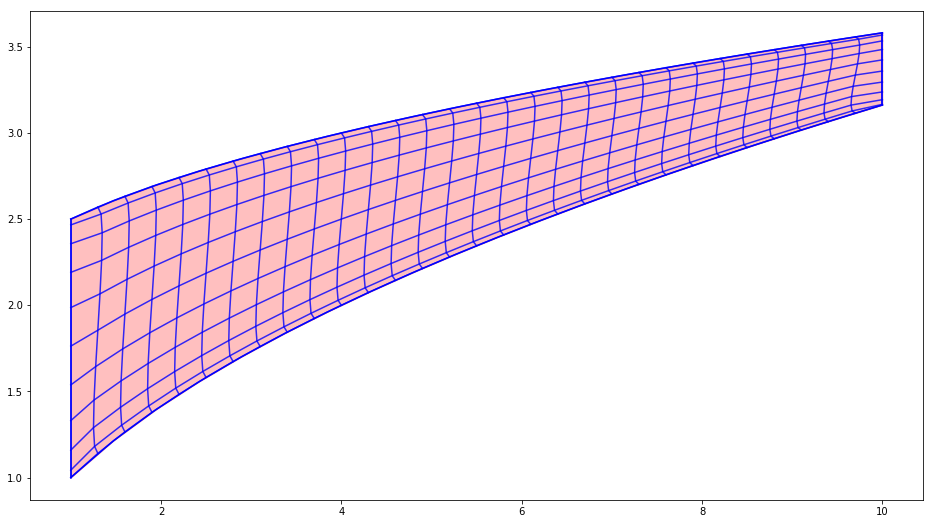

In [24]:
meshy(1, 1, 1, 1)